<a href="https://colab.research.google.com/github/chiranjeevibmse/imdb_ml_assignment/blob/main/parta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Group : ML_GROUP_152

Data Set: IMDB Moview Data set (https://www.imdb.com/interfaces/) or (https://datasets.imdbws.com/)

Contributers:

Name: Chiranjeevi GK [2022DA04208]

Name: Kishore MK [2022DA04680]

Name: Satish K []

**Step 1: Import Libraries/Dataset**

1.   Installing the reqired libraties

In [1]:
%pip install ydata-profiling
%pip install ipywidgets

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Program Files\Python39\python.exe -m pip install --upgrade pip' command.


Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Program Files\Python39\python.exe -m pip install --upgrade pip' command.


b. Import the required libraries

In [2]:
import pandas as pd
from ydata_profiling import ProfileReport
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

a. Download the dataset


In [3]:
title_basics_tsv_file = 'https://datasets.imdbws.com/title.basics.tsv.gz'
#title_basics_tsv_file = '../data/title.basics.tsv.gz'
df_title_basics  = pd.read_csv(title_basics_tsv_file, sep='\t',compression='gzip')

print(df_title_basics.columns)

C:\Users\Chiru\AppData\Local\Temp\ipykernel_325548\3337619676.py:3: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df_title_basics  = pd.read_csv(title_basics_tsv_file, sep='\t',compression='gzip')


Index(['tconst', 'titleType', 'primaryTitle', 'originalTitle', 'isAdult',
       'startYear', 'endYear', 'runtimeMinutes', 'genres'],
      dtype='object')


In [4]:
name_basics_tsv_file='https://datasets.imdbws.com/name.basics.tsv.gz'
#name_basics_tsv_file='../data/name.basics.tsv.gz'
df_name_basics = pd.read_csv(name_basics_tsv_file, sep='\t',compression='gzip')
print(df_name_basics.columns)

Index(['nconst', 'primaryName', 'birthYear', 'deathYear', 'primaryProfession',
       'knownForTitles'],
      dtype='object')


In [5]:
title_crew_tsv_file='https://datasets.imdbws.com/title.crew.tsv.gz'
#title_crew_tsv_file='../data/title.crew.tsv.gz'
df_title_crew = pd.read_csv(title_crew_tsv_file, sep='\t',compression='gzip')
print(df_title_crew.columns)

Index(['tconst', 'directors', 'writers'], dtype='object')


In [6]:
title_episode_tsv_file = 'https://datasets.imdbws.com/title.episode.tsv.gz'
#title_episode_tsv_file = '../data/title.episode.tsv.gz'
df_title_episode = pd.read_csv(title_episode_tsv_file, sep='\t',compression='gzip')
print(df_title_episode.columns)

Index(['tconst', 'parentTconst', 'seasonNumber', 'episodeNumber'], dtype='object')


In [7]:
title_ratings_tsv_file = 'https://datasets.imdbws.com/title.ratings.tsv.gz'
#title_ratings_tsv_file = '../data/title.ratings.tsv.gz'
df_title_ratings = pd.read_csv(title_ratings_tsv_file, sep='\t',compression='gzip')
print(df_title_ratings.columns)

Index(['tconst', 'averageRating', 'numVotes'], dtype='object')


**Step 2: Data Visualization and Exploration**

a.	Print at least 5 rows for sanity check to identify all the features present in the dataset and if the target matches with them.

b.	Print the description and shape of the dataset.

c.	Provide appropriate visualization to get an insight about the dataset.

d.	Try exploring the data and see what insights can be drawn from the dataset.



a. Print at least 5 rows for sanity check to identify all the features present in the dataset and if the target matches with them.

In [8]:
print(df_title_basics.head())
print(df_name_basics.head())
print(df_title_crew.head())
print(df_title_episode.head())
print(df_title_ratings.head())

      tconst titleType            primaryTitle           originalTitle  \
0  tt0000001     short              Carmencita              Carmencita   
1  tt0000002     short  Le clown et ses chiens  Le clown et ses chiens   
2  tt0000003     short          Pauvre Pierrot          Pauvre Pierrot   
3  tt0000004     short             Un bon bock             Un bon bock   
4  tt0000005     short        Blacksmith Scene        Blacksmith Scene   

  isAdult startYear endYear runtimeMinutes                    genres  
0       0      1894      \N              1         Documentary,Short  
1       0      1892      \N              5           Animation,Short  
2       0      1892      \N              4  Animation,Comedy,Romance  
3       0      1892      \N             12           Animation,Short  
4       0      1893      \N              1              Comedy,Short  
      nconst      primaryName birthYear deathYear  \
0  nm0000001     Fred Astaire      1899      1987   
1  nm0000002    Lauren 

b. Print the description and shape of the dataset.

In [9]:
print('df_title_basics : Shape')
print(df_title_basics.shape)
print('df_name_basics : Shape')
print(df_name_basics.shape)
print('df_title_crew : Shape')
print(df_title_crew.shape)
print('df_title_episode : Shape')
print(df_title_episode.shape)
print('df_title_ratings : Shape')
print(df_title_ratings.shape)

print('df_title_basics : Describe')
print(df_title_basics.describe())
print('df_name_basics : Describe')
print(df_name_basics.describe())
print('df_title_crew : Describe')
print(df_title_crew.describe())
print('df_title_episode : Describe')
print(df_title_episode.describe())
print('df_title_ratings : Describe')
print(df_title_ratings.describe())

df_title_basics : Shape
(10092079, 9)
df_name_basics : Shape
(12780526, 6)
df_title_crew : Shape
(10092079, 3)
df_title_episode : Shape
(7682124, 4)
df_title_ratings : Shape
(1339266, 3)
df_title_basics : Describe
           tconst  titleType  primaryTitle originalTitle   isAdult startYear  \
count    10092079   10092079      10092068      10092068  10092079  10092079   
unique   10092079         11       4548421       4570709        14       154   
top     tt0000001  tvEpisode  Episode #1.1  Episode #1.1         0        \N   
freq            1    7682230         48772         48772   9710586   1355101   

         endYear runtimeMinutes    genres  
count   10092079       10092079  10092062  
unique        96            895      2344  
top           \N             \N     Drama  
freq     9980703        7083418   1150586  
df_name_basics : Describe
           nconst primaryName birthYear deathYear primaryProfession  \
count    12780526    12780523  12780526  12780526          10282917 

c.	Provide appropriate visualization to get an insight about the dataset. 

In [10]:
print(df_title_crew.columns)
print(df_name_basics.columns)
print(df_title_ratings.columns)
print(df_title_basics.columns)
df_merged_directors = pd.merge(left=df_title_crew,right=df_name_basics[['nconst', 'primaryName']], left_on='directors', right_on='nconst', how='left')
df_merged_directors.rename(columns={'primaryName': 'director_names'}, inplace=True)
df_merged_directors.drop(columns=['nconst'], inplace=True)
print(df_merged_directors.head())
# Merge for 'writers'
df_merged_writers = pd.merge(left=df_title_crew, right=df_name_basics[['nconst', 'primaryName']], left_on='writers', right_on='nconst', how='left')
df_merged_writers.rename(columns={'primaryName': 'writer_names'}, inplace=True)
df_merged_writers.drop(columns=['nconst'], inplace=True)

print(df_merged_writers.head())

df_title_crew = pd.merge(left=df_title_crew, right=df_merged_directors[['tconst', 'director_names']], on='tconst', how='left')
df_title_crew = pd.merge(left=df_title_crew, right=df_merged_writers[['tconst', 'writer_names']], on='tconst', how='left')
df_title_crew.drop(columns=['directors','writers'], inplace=True)
print(df_title_crew.head())
imdb_df = pd.merge(left=df_title_basics,right=df_title_ratings,  left_on='tconst', right_on='tconst', how='left')
imdb_df = pd.merge(left=imdb_df,right=df_title_crew, left_on='tconst', right_on='tconst',how='left')
del df_title_basics
del df_merged_writers
del df_merged_directors
del df_title_crew
del df_title_ratings
print(imdb_df.head())

Index(['tconst', 'directors', 'writers'], dtype='object')
Index(['nconst', 'primaryName', 'birthYear', 'deathYear', 'primaryProfession',
       'knownForTitles'],
      dtype='object')
Index(['tconst', 'averageRating', 'numVotes'], dtype='object')
Index(['tconst', 'titleType', 'primaryTitle', 'originalTitle', 'isAdult',
       'startYear', 'endYear', 'runtimeMinutes', 'genres'],
      dtype='object')
      tconst  directors writers        director_names
0  tt0000001  nm0005690      \N  William K.L. Dickson
1  tt0000002  nm0721526      \N         Émile Reynaud
2  tt0000003  nm0721526      \N         Émile Reynaud
3  tt0000004  nm0721526      \N         Émile Reynaud
4  tt0000005  nm0005690      \N  William K.L. Dickson
      tconst  directors writers writer_names
0  tt0000001  nm0005690      \N          NaN
1  tt0000002  nm0721526      \N          NaN
2  tt0000003  nm0721526      \N          NaN
3  tt0000004  nm0721526      \N          NaN
4  tt0000005  nm0005690      \N          NaN
  

d.	Try exploring the data and see what insights can be drawn from the dataset

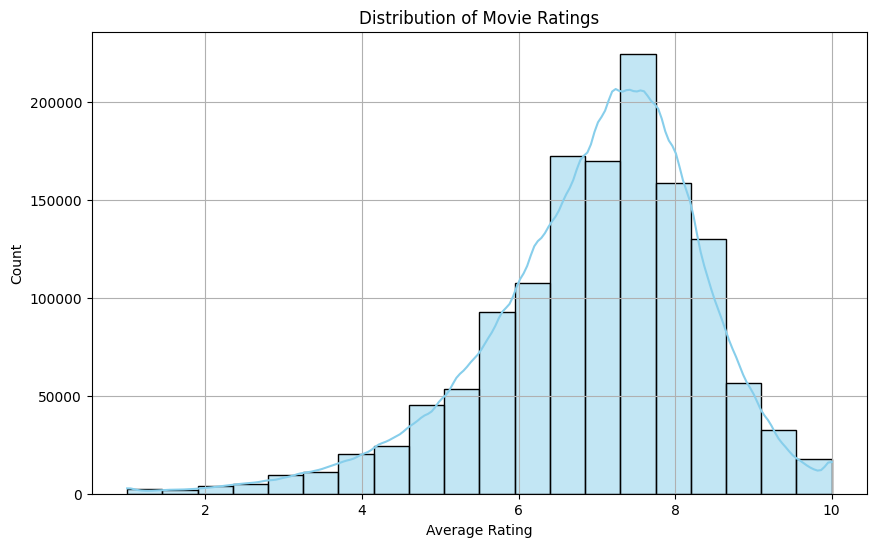

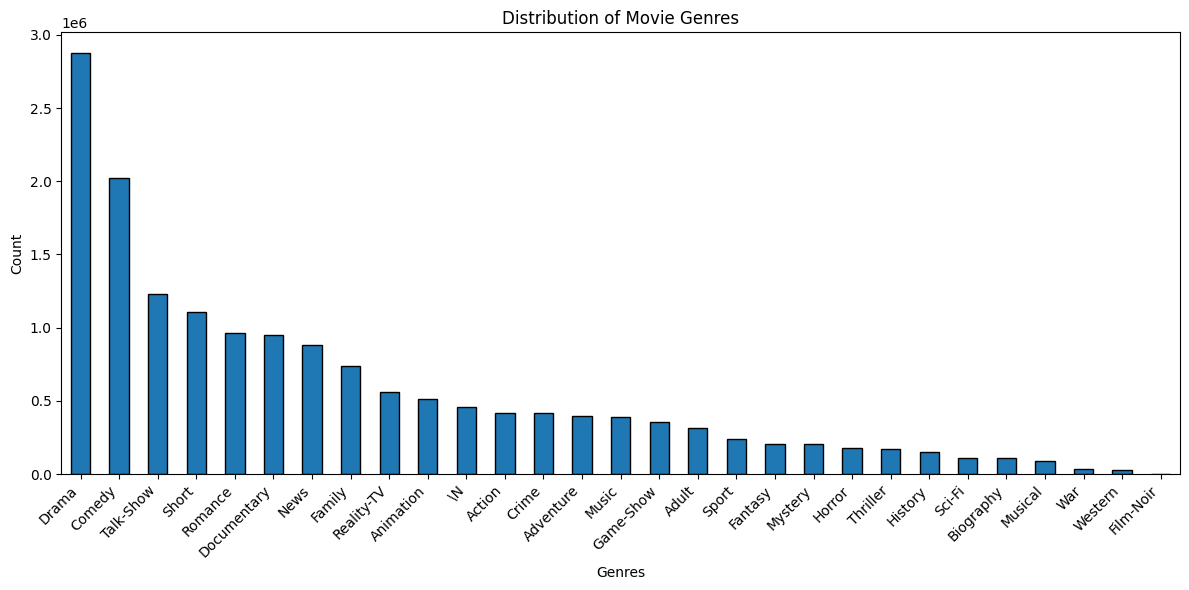

In [11]:

plt.figure(figsize=(10, 6))
sns.histplot(imdb_df['averageRating'], bins=20, kde=True, color='skyblue', edgecolor='black')
plt.xlabel('Average Rating')
plt.ylabel('Count')
plt.title('Distribution of Movie Ratings')
plt.grid(True)
plt.show()

genre_counts = imdb_df['genres'].str.split(',').explode().value_counts()

# Plotting the histogram for movie genres
plt.figure(figsize=(12, 6))
genre_counts.plot(kind='bar', edgecolor='black')
plt.xlabel('Genres')
plt.ylabel('Count')
plt.title('Distribution of Movie Genres')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


More Drama movies are created, and then Comedy moves

**3.	Data Pre-processing and cleaning**

a.	Do the appropriate preprocessing of the data like identifying NULL or Missing Values if any, handling of outliers if present in the dataset, skewed data etc. Apply appropriate feature engineering techniques for them

In [12]:
print(imdb_df.shape)
imdb_df.dropna(inplace=True)
print(imdb_df.shape)
print(imdb_df.describe())
# print(imdb_df['runtimeMinutes'].dtype)
# print(imdb_df['runtimeMinutes'].unique())
# Clean the 'runtimeMinutes' column by removing '\n' characters
imdb_df['runtimeMinutes'] = imdb_df['runtimeMinutes'].str.replace('\n', '', regex=True)
# Convert the 'runtimeMinutes' column to numeric
imdb_df['runtimeMinutes'] = pd.to_numeric(imdb_df['runtimeMinutes'], errors='coerce')
print(imdb_df.shape)
imdb_df.dropna(inplace=True)
print(imdb_df.shape)
print(imdb_df.describe())

(10092079, 13)
(343957, 13)
       averageRating      numVotes
count  343957.000000  3.439570e+05
mean        6.772997  8.619297e+02
std         1.469950  1.499249e+04
min         1.000000  5.000000e+00
25%         5.900000  1.100000e+01
50%         6.900000  2.300000e+01
75%         7.800000  8.100000e+01
max        10.000000  2.454592e+06
(343957, 13)
(271001, 13)
       runtimeMinutes  averageRating      numVotes
count   271001.000000  271001.000000  2.710010e+05
mean        58.430105       6.675890  1.080960e+03
std         97.491715       1.440976  1.688298e+04
min          1.000000       1.000000  5.000000e+00
25%         20.000000       5.800000  1.200000e+01
50%         56.000000       6.800000  2.800000e+01
75%         90.000000       7.700000  1.080000e+02
max      43200.000000      10.000000  2.454592e+06


b.	Apply the feature transformation techniques like Standardization, Normalization, etc. You are free to apply the appropriate transformations depending upon the structure and the complexity of your dataset

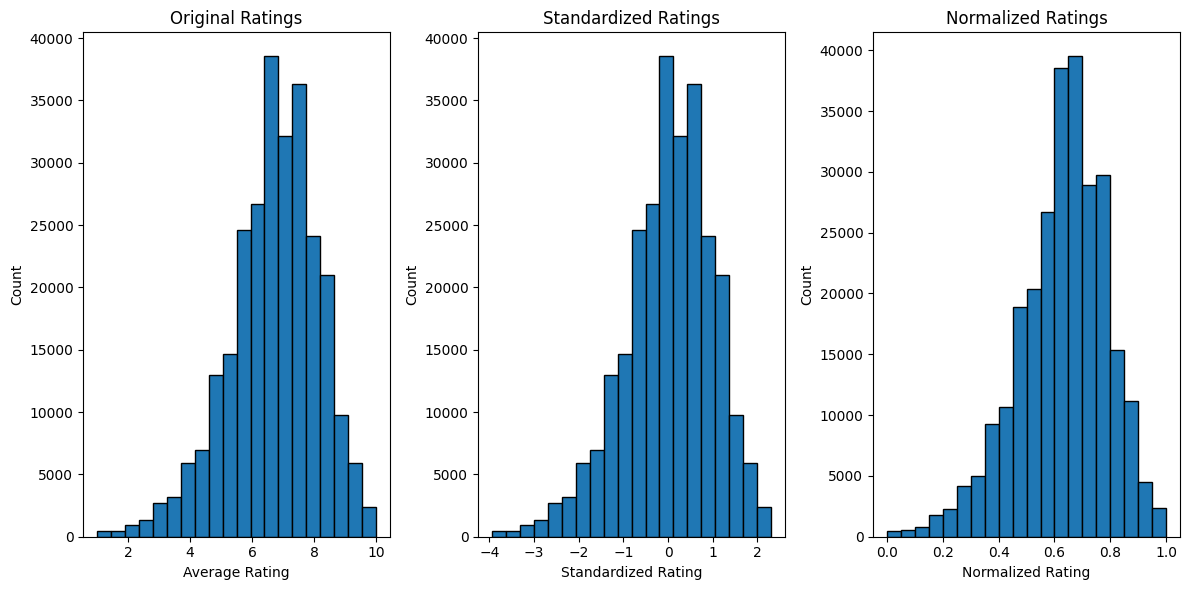

In [13]:
# Extract the average rating column for transformation
ratings = imdb_df['averageRating'].values.reshape(-1, 1)

# Apply Standardization (Z-score normalization)
scaler_standardization = StandardScaler()
ratings_standardized = scaler_standardization.fit_transform(ratings)

# Apply Min-Max Normalization
scaler_minmax = MinMaxScaler()
ratings_normalized = scaler_minmax.fit_transform(ratings)

# Plot histograms before and after transformations
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.hist(ratings, bins=20, edgecolor='black')
plt.xlabel('Average Rating')
plt.ylabel('Count')
plt.title('Original Ratings')

plt.subplot(1, 3, 2)
plt.hist(ratings_standardized, bins=20, edgecolor='black')
plt.xlabel('Standardized Rating')
plt.ylabel('Count')
plt.title('Standardized Ratings')

plt.subplot(1, 3, 3)
plt.hist(ratings_normalized, bins=20, edgecolor='black')
plt.xlabel('Normalized Rating')
plt.ylabel('Count')
plt.title('Normalized Ratings')

plt.tight_layout()
plt.show()

c.	Do the correlational analysis on the dataset. Provide a visualization for the same.

C:\Users\Chiru\AppData\Local\Temp\ipykernel_325548\1981324633.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = imdb_df.corr()


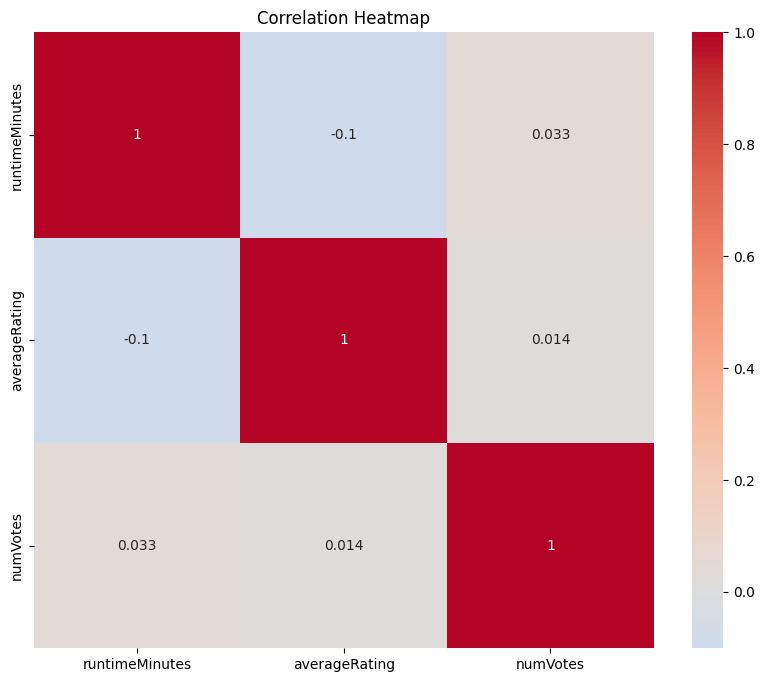

In [14]:
# Compute the correlation matrix
correlation_matrix = imdb_df.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

**4.	Data Preparation**

a.	Do the final feature selection and extract them into Column X and the class label into Column into Y

In [15]:
# Assume you want to predict 'averageRating'
y = imdb_df['averageRating']

# Select relevant features (columns) for X
# Example: Let's assume you want to use 'numVotes' and 'runtimeMinutes' as features
selected_features = ['numVotes', 'runtimeMinutes']
X = imdb_df[selected_features]

b.	Split the dataset into training and test sets.

In [16]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shape of the selected features and class labels
print('Shape of X:', X.shape)
print('Shape of y:', y.shape)

Shape of X: (271001, 2)
Shape of y: (271001,)


**Part B**

**1.	Model Building**

a.	Perform Model Development using at least three models, separately. You are free to apply any Machine Learning Models on the dataset. Deep Learning Models are strictly not allowed

In [17]:
# Model 1: Linear Regression
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
print('Linear Regression MSE:', mse_lr)

# Model 2: Random Forest Regression
model_rf = RandomForestRegressor(random_state=42)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print('Random Forest Regression MSE:', mse_rf)

# Model 3: Gradient Boosting Regression
model_gb = GradientBoostingRegressor(random_state=42)
model_gb.fit(X_train, y_train)
y_pred_gb = model_gb.predict(X_test)
mse_gb = mean_squared_error(y_test, y_pred_gb)
print('Gradient Boosting Regression MSE:', mse_gb)

Linear Regression MSE: 2.062956814410651


Random Forest Regression MSE: 1.962485888720751
Gradient Boosting Regression MSE: 1.7630452385674469


b. Train the model and print the training accuracy and loss values

In [18]:
# Predict on the training set
y_pred_train_lr = model_lr.predict(X_train)

# Calculate the mean squared error (MSE) on the training set
mse_train_lr = mean_squared_error(y_train, y_pred_train_lr)

print(f"Training Linear Regression MSE: {mse_train_lr}")

y_pred_train_rf = model_rf.predict(X_train)
mse_train_rf = mean_squared_error(y_train, y_pred_train_rf)
print(f"Training Random Forest Regression MSE: {mse_train_rf}")

y_pred_train_gb = model_gb.predict(X_train)
mse_train_gb = mean_squared_error(y_train, y_pred_train_gb)
print(f"Training Gradient Boosting Regression MSE: {mse_train_gb}")

Training Linear Regression MSE: 2.0531950917701773
Training Random Forest Regression MSE: 1.383377105302326
Training Gradient Boosting Regression MSE: 1.7351237548355278


**2.	Performance Evaluation**

a.	Print the confusion matrix. Provide appropriate analysis for the same. 


The confusion matrix is tool to evaluate the performance of a classification model. However, in our case, we are working on a regression problem (predicting the 'averageRating'), which means there are continuous numerical values as targets rather than discrete classes. The confusion matrix is typically used in classification tasks where you have classes to predict.

For regression tasks like predicting 'averageRating', common evaluation metrics include Mean Squared Error (MSE), Root Mean Squared Error (RMSE), Mean Absolute Error (MAE), and R-squared (Coefficient of Determination). These metrics provide information about how well your regression model's predictions match the actual values.

In [19]:
# Calculate evaluation metrics

y_test_train_lr = model_lr.predict(X_test)
mse_lr = mean_squared_error(y_test, y_test_train_lr)
rmse_lr = mean_squared_error(y_test, y_test_train_lr, squared=False)
mae_lr = mean_absolute_error(y_test, y_test_train_lr)
r2_lr = r2_score(y_test, y_test_train_lr)

print(f"MSE Linear Regression: {mse_lr}")
print(f"RMSE Linear Regression: {rmse_lr}")
print(f"MAE Linear Regression: {mae_lr}")
print(f"R-squared Linear Regression: {r2_lr}")

y_test_train_rf = model_rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_test_train_rf)
rmse_rf = mean_squared_error(y_test, y_test_train_rf, squared=False)
mae_rf = mean_absolute_error(y_test, y_test_train_rf)
r2_rf = r2_score(y_test, y_test_train_rf)

print(f"MSE Random Forest Regression: {mse_rf}")
print(f"RMSE Random Forest Regression: {rmse_rf}")
print(f"MAE Random Forest Regression: {mae_rf}")
print(f"R-squared Random Forest Regression: {r2_rf}")

y_test_train_gb = model_gb.predict(X_test)
mse_gb = mean_squared_error(y_test, y_test_train_gb)
rmse_gb = mean_squared_error(y_test, y_test_train_gb, squared=False)
mae_gb = mean_absolute_error(y_test, y_test_train_gb)
r2_gb = r2_score(y_test, y_test_train_gb)

print(f"MSE Gradient Boosting Regression : {mse_gb}")
print(f"RMSE Gradient Boosting Regression : {rmse_gb}")
print(f"MAE Gradient Boosting Regression : {mae_gb}")
print(f"R-squared Gradient Boosting Regression : {r2_gb}")

MSE Linear Regression: 2.062956814410651
RMSE Linear Regression: 1.436299695192703
MAE Linear Regression: 1.1239451599590338
R-squared Linear Regression: 0.014908317189070819
MSE Random Forest Regression: 1.962485888720751
RMSE Random Forest Regression: 1.4008875360715973
MAE Random Forest Regression: 1.083346862043753
R-squared Random Forest Regression: 0.06288463572858927
MSE Gradient Boosting Regression : 1.7630452385674469
RMSE Gradient Boosting Regression : 1.3277971375806799
MAE Gradient Boosting Regression : 1.026655860560133
R-squared Gradient Boosting Regression : 0.15812042753383426


b.	Do the prediction for the test data and display the results for the inference

In [20]:
# Display the predicted 'averageRating' for the test data
results_lr = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_train_lr})
print('Linear Regression')
print(results_lr)

results_rf = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_train_rf})
print('Random Forest Regression')
print(results_rf)


results_gb = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_train_gb})
print('Gradient Boosting Regression')
print(results_gb)

Linear Regression
         Actual  Predicted
616010      7.8   6.710991
7498565     6.4   6.719980
7350850     4.5   6.598888
2800068     3.4   6.626497
110714      6.2   6.634557
...         ...        ...
172399      4.2   6.640936
560587      7.5   6.711009
143516      5.1   6.741546
2556322     7.9   6.615470
277970      6.1   6.527568

[54201 rows x 2 columns]
Random Forest Regression
         Actual  Predicted
616010      7.8   7.307768
7498565     6.4   6.969038
7350850     4.5   6.069390
2800068     3.4   6.366702
110714      6.2   5.721417
...         ...        ...
172399      4.2   6.219052
560587      7.5   7.297394
143516      5.1   6.882502
2556322     7.9   6.304520
277970      6.1   7.763633

[54201 rows x 2 columns]
Gradient Boosting Regression
         Actual  Predicted
616010      7.8   7.254837
7498565     6.4   7.167265
7350850     4.5   6.650171
2800068     3.4   5.644620
110714      6.2   5.496315
...         ...        ...
172399      4.2   6.288840
560587      